In [27]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

<class 'ModuleNotFoundError'>: No module named 'seaborn'

In [2]:
df = pd.read_csv('top_1000_most_swapped_books.csv')

df.head()

,id,title,author,genre,language,publicationYear,publisher,description,pageCount,tags,rating_average,most_popular_country,bestseller_status,awards,age_category,adapted_to_movie,movie_release_year,isbn
0,1,Harry Potter and the Sorcerer's Stone,J.K. Rowling,Fantasy,English,1997,Bloomsbury,A young wizard discovers his magical heritage ...,309,"magic,school,adventure",4.89,UK,True,"Smarties Prize,British Book Award",Children,True,2001.0,978-0747532743
1,2,To Kill a Mockingbird,Harper Lee,Southern Gothic,English,1960,J.B. Lippincott & Co.,A lawyer in the Depression-era South defends a...,281,"classic,law,racism,history",4.85,USA,True,Pulitzer Prize,Adult,True,1962.0,978-0061120084
2,3,1984,George Orwell,Dystopian,English,1949,Secker & Warburg,A dystopian social science fiction novel and c...,328,"politics,scifi,totalitarianism",4.80,UK,True,Prometheus Hall of Fame,Adult,True,1984.0,978-0451524935
3,4,The Great Gatsby,F. Scott Fitzgerald,Tragedy,English,1925,Charles Scribner's Sons,A story of the fabulously wealthy Jay Gatsby a...,180,"classic,wealth,romance,jazz age",4.40,USA,True,NaN,Adult,True,2013.0,978-0743273565
4,5,The Hobbit,J.R.R. Tolkien,Fantasy,English,1937,George Allen & Unwin,"Bilbo Baggins, a hobbit, is swept into an epic...",310,"adventure,dragons,magic",4.75,UK,True,Keith Barker Millennium Book Award,Children,True,2012.0,978-0547928227


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    990 non-null    int64  
 1   title                 990 non-null    object 
 2   author                990 non-null    object 
 3   genre                 990 non-null    object 
 4   language              990 non-null    object 
 5   publicationYear       990 non-null    int64  
 6   publisher             990 non-null    object 
 7   description           990 non-null    object 
 8   pageCount             990 non-null    int64  
 9   tags                  990 non-null    object 
 10  rating_average        990 non-null    float64
 11  most_popular_country  990 non-null    object 
 12  bestseller_status     990 non-null    bool   
 13  awards                384 non-null    object 
 14  age_category          990 non-null    object 
 15  adapted_to_movie      9

In [ ]:
Задание 1.1
Какова вероятность того, что книга является бестселлером (bestseller_status = True), если её жанр — “Fantasy”?

In [15]:
# Способ 1 - вручную
fantasies = df[df['genre']=='Fantasy']
P_fantasy = (df['genre']=='Fantasy').mean()
P_bestseller_and_fantasy = ((df['bestseller_status']==True) & (df['genre']=='Fantasy')).mean()

P_bestselles_if_fantasy = P_bestseller_and_fantasy/P_fantasy
print(f"P(Бестселлер | жанр = 'Fantasy'), рассчитаная вручную = {P_bestselles_if_fantasy}")

P(Бестселлер | жанр = 'Fantasy'), рассчитаная вручную = 1.0


In [16]:
# Способ 2 - фильтр
fantasies = df[df['genre'] == 'Fantasy']
P_bestseller_if_fantasy = (fantasies['bestseller_status']==True).mean()

print(f"P(Бестселлер | жанр = 'Fantasy'), рассчитаная через фильтр = {P_bestseller_if_fantasy}")

P(Бестселлер | жанр = 'Fantasy'), рассчитаная через фильтр = 1.0


In [ ]:
Задание 1.2
Какова вероятность того, что книга адаптирована в фильм (adapted_to_movie = True), если она относится к возрастной категории “Adult”?

In [18]:
# Способ 1 - вручную
adapted = df[df['adapted_to_movie'] == True]
P_adapted = (df['adapted_to_movie']==True).mean()
P_adapted_and_adult = ((df['adapted_to_movie']==True) & (df['age_category']=='Adult')).mean()

P_adapted_if_adult = P_adapted_and_adult/P_adapted
print(f"P(Адаптирован в фильм | возраст = 'Adult'), рассчитаная вручную = {P_adapted_if_adult}")

P(Адаптирован в фильм | возраст = 'Adult'), рассчитаная вручную = 0.7686335403726708


In [10]:
# Способ 2 - фильтр
adapted = df[df['adapted_to_movie'] == True]
P_adult_if_adapted = (adapted['age_category'] == 'Adult').mean()

print(f"P(Адаптирован в фильм | возраст = 'Adult'), рассчитанная через фильтр = {P_adult_if_adapted}")

P(Адаптирован в фильм | возраст = 'Adult') = 0.7686335403726708


In [ ]:
Задание 1.3
Какова вероятность того, что книга имеет средний рейтинг выше 4.0, если она является бестселлером?

In [21]:
# Способ 1 - вручную
rating = df[df['rating_average'] > 4.0]
P_rating_average = (df['rating_average'] > 4.0).mean()
P_bestseller_and_rating = ((df['rating_average']>4.0) & (df['bestseller_status']==True)).mean()

P_bestseller_if_rating = P_bestseller_and_rating/P_rating_average
print(f"P(rating_average > 4.0 | bestseller = True), рассчитанная вручную = {P_bestseller_if_rating}")

P(rating_average > 4.0 | bestseller = True), рассчитанная вручную = 0.9983333333333333


In [19]:
# Способ 2 - фильтр
rating = df[df['rating_average'] > 4.0]
P_bestseller_if_rating = (rating['bestseller_status'] == True).mean()

print(f"P(rating_average > 4.0 | bestseller = True), рассчитанная через фильтр = {P_bestseller_if_rating}")

P(rating_average > 4.0 | bestseller = True), рассчитанная через фильтр = 0.9983333333333333


In [ ]:
Задание 2.1
Известны вероятности того, что книга адаптирована в фильм для каждой возрастной категории. Используя формулу полной вероятности, найти общую вероятность того, что случайно выбранная книга адаптирована в фильм.

In [22]:
# Функция условной вероятности (из примера с Титаником)
def conditional_probability(df, condition_col, condition_val, target_col, target_val=True):
    subset = df[df[condition_col] == condition_val]
    if len(subset) == 0:
        return 0
    return (subset[target_col] == target_val).mean()

age_categories = df['age_category'].dropna().unique()

total_prob = 0
contributions = []

for cat in age_categories:
    P_cat = (df['age_category'] == cat).mean()
    P_adapted_given_cat = conditional_probability(df, 'age_category', cat, 'adapted_to_movie', True)
   
    contribution = P_adapted_given_cat * P_cat
    total_prob += contribution
    contributions.append({
        'Возрастная категория': cat,
        'P(Категория)': round(P_cat, 4),
        'P(Адаптирована | Категория)': round(P_adapted_given_cat, 4),
        'Вклад': round(contribution, 4)
    })

contributions_df = pd.DataFrame(contributions)

print("ФОРМУЛА ПОЛНОЙ ВЕРОЯТНОСТИ:")
print(contributions_df)
print(f"\nОбщая вероятность адаптации P(adapted) = {total_prob:.4f}")
print(f"Прямой расчёт из данных: P(adapted) = {df['adapted_to_movie'].mean():.4f}")

ФОРМУЛА ПОЛНОЙ ВЕРОЯТНОСТИ:
  Возрастная категория  P(Категория)  P(Адаптирована | Категория)   Вклад
0             Children        0.1010                       0.8100  0.0818
1                Adult        0.7859                       0.6362  0.5000
2          Young Adult        0.1131                       0.6071  0.0687

Общая вероятность адаптации P(adapted) = 0.6505
Прямой расчёт из данных: P(adapted) = 0.6505


In [ ]:
Задача 3
Мы видим книгу, которая адаптирована в фильм. Какова вероятность того, что она относится к жанру “Fantasy”?

In [23]:
P_fantasy = (df['genre'] == 'Fantasy').mean()
P_adapted_given_fantasy = conditional_probability(df, 'genre', 'Fantasy', 'adapted_to_movie', True)
P_adapted = df['adapted_to_movie'].mean()  # или total_prob из задачи 2

P_fantasy_given_adapted = (P_adapted_given_fantasy * P_fantasy) / P_adapted

print("ТЕОРЕМА БАЙЕСА:")
print(f"P(Fantasy) = {P_fantasy:.4f}")
print(f"P(adapted | Fantasy) = {P_adapted_given_fantasy:.4f}")
print(f"P(adapted) = {P_adapted:.4f}")
print(f"\nP(Fantasy | adapted) = [P(adapted|Fantasy) * P(Fantasy)] / P(adapted)")
print(f"P(Fantasy | adapted) = ({P_adapted_given_fantasy:.4f} * {P_fantasy:.4f}) / {P_adapted:.4f}")
print(f"P(Fantasy | adapted) = {P_fantasy_given_adapted:.4f}")

ТЕОРЕМА БАЙЕСА:
P(Fantasy) = 0.1566
P(adapted | Fantasy) = 0.4968
P(adapted) = 0.6505

P(Fantasy | adapted) = [P(adapted|Fantasy) * P(Fantasy)] / P(adapted)
P(Fantasy | adapted) = (0.4968 * 0.1566) / 0.6505
P(Fantasy | adapted) = 0.1196


In [ ]:
Сравнить априорное распределение жанров P(Жанр) и апостериорное распределение P(Жанр | adapted). Сделать вывод о том, какие жанры чаще адаптируются в кино относительно их общей доли в каталоге.

In [24]:
def conditional_probability(df, condition_col, condition_val, target_col, target_val=True):
    subset = df[df[condition_col] == condition_val]
    if len(subset) == 0:
        return 0
    return (subset[target_col] == target_val).mean()

top_genres = df['genre'].value_counts().head(6).index.tolist()

prior_probs = []
posterior_probs = []
prob_increase = []

P_adapted = df['adapted_to_movie'].mean()

for genre in top_genres:
    P_genre = (df['genre'] == genre).mean()
    
    P_adapted_given_genre = conditional_probability(df, 'genre', genre, 'adapted_to_movie', True)
    
    P_genre_given_adapted = (P_adapted_given_genre * P_genre) / P_adapted if P_adapted > 0 else 0
    
    # Сохраняем
    prior_probs.append(P_genre)
    posterior_probs.append(P_genre_given_adapted)
    
    if P_genre > 0:
        increase = (P_genre_given_adapted - P_genre) / P_genre * 100
    else:
        increase = 0
    prob_increase.append(increase)

comparison_df = pd.DataFrame({
    'Жанр': top_genres,
    'P(Жанр)': prior_probs,
    'P(Жанр | adapted)': posterior_probs,
    'Прирост (%)': prob_increase
})

comparison_df = comparison_df.sort_values('Прирост (%)', ascending=False)

print("СРАВНЕНИЕ АПРИОРНОГО И АПОСТЕРИОРНОГО РАСПРЕДЕЛЕНИЯ ЖАНРОВ")
print("=" * 70)
print(comparison_df.round(4))
print("\nОбщая вероятность адаптации P(adapted) =", round(P_adapted, 4))

СРАВНЕНИЕ АПРИОРНОГО И АПОСТЕРИОРНОГО РАСПРЕДЕЛЕНИЯ ЖАНРОВ
                 Жанр  P(Жанр)  P(Жанр | adapted)  Прирост (%)
5             Romance   0.0576             0.0714      24.0602
4            Thriller   0.0667             0.0761      14.1304
2  Historical Fiction   0.0758             0.0776       2.4845
1              Sci-Fi   0.0919             0.0823     -10.4669
3             Fiction   0.0697             0.0621     -10.8831
0             Fantasy   0.1566             0.1196     -23.6325

Общая вероятность адаптации P(adapted) = 0.6505


<ipython-input-28-52ccef4ba01a>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(top_genres, rotation=45, ha='right')


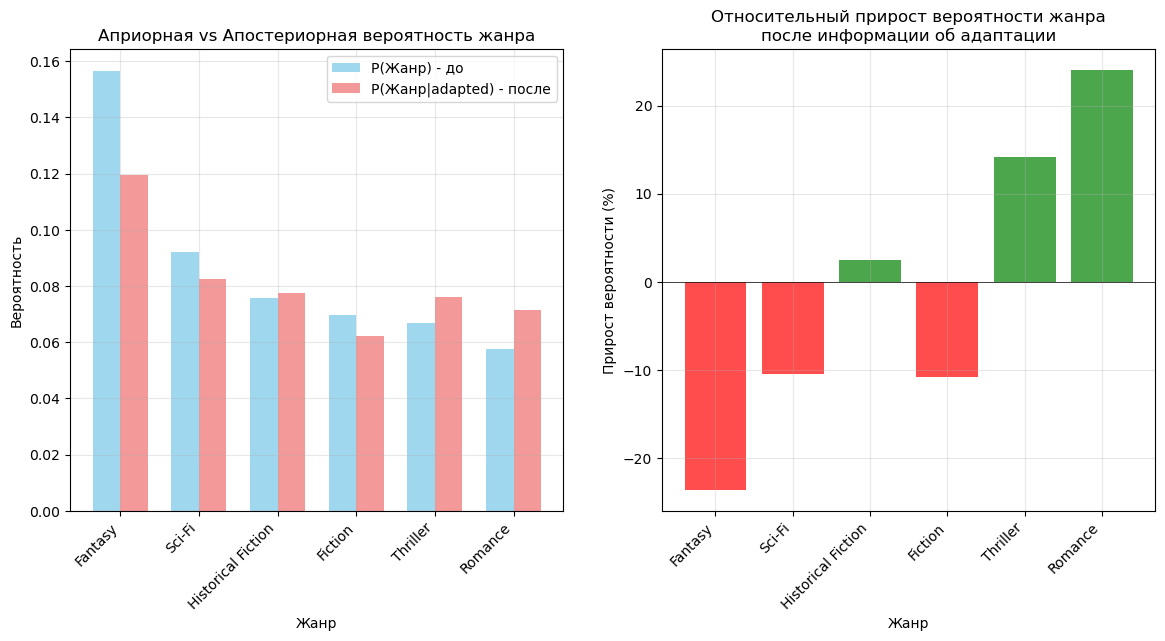

<class 'AttributeError'>: module 'matplotlib' has no attribute 'tight_layout'

In [28]:
fig, (ax1, ax2) = plt.pyplot.subplots(1, 2, figsize=(14, 6))

x = range(len(top_genres))
width = 0.35

ax1.bar([i - width/2 for i in x], prior_probs, width, label='P(Жанр) - до', color='skyblue', alpha=0.8)
ax1.bar([i + width/2 for i in x], posterior_probs, width, label='P(Жанр|adapted) - после', color='lightcoral', alpha=0.8)

ax1.set_xlabel('Жанр')
ax1.set_ylabel('Вероятность')
ax1.set_title('Априорная vs Апостериорная вероятность жанра')
ax1.set_xticks(x)
ax1.set_xticklabels(top_genres, rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3)

colors = ['green' if inc > 0 else 'red' for inc in prob_increase]
ax2.bar(top_genres, prob_increase, color=colors, alpha=0.7)
ax2.set_xlabel('Жанр')
ax2.set_ylabel('Прирост вероятности (%)')
ax2.set_title('Относительный прирост вероятности жанра\nпосле информации об адаптации')
ax2.set_xticklabels(top_genres, rotation=45, ha='right')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()